In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from thermo_models.WilsonModel import *
from distillation.DistillationModel import DistillationModel
from distillation.DistillationTernary import DistillationModelTernary
from utils.AntoineEquation import AntoineEquationBase10
import ipywidgets as widgets


# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])


In [2]:
xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.990, 0.0100, 1e-10])
xB = np.array([1e-5, 0.4261,0.5749])
reflux = 1.518

distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = reflux)

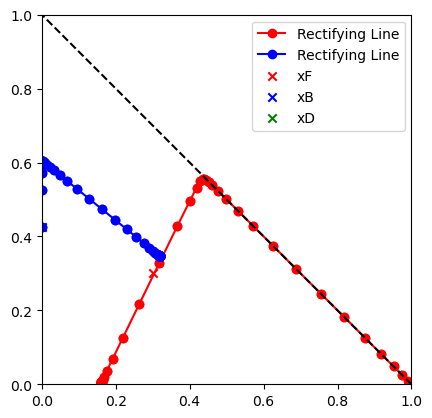

In [3]:
x_rect_comp = distillation_model.compute_rectifying_stages()[0]
x_strip_comp = distillation_model.compute_stripping_stages()[0]

# Extract x and y coordinates from x_array
x1_rect = x_rect_comp[:, 0]
x2_rect = x_rect_comp[:, 1]
x1_strip = x_strip_comp[:, 0]
x2_strip = x_strip_comp[:, 1]

# Plot the line connecting the points
plt.plot(x1_rect, x2_rect, '-o', label='Rectifying Line', color = "red")  # '-o' means a line with circle markers at each data point
plt.plot(x1_strip, x2_strip, '-o', label='Rectifying Line', color = "blue")  # '-o' means a line with circle markers at each data point

# Mark your special points
plt.scatter(xF[0], xF[1], marker='x', color='red', label='xF')
plt.scatter(xB[0], xB[1], marker='x', color='blue', label='xB')
plt.scatter(xD[0], xD[1], marker='x', color='green', label='xD')

# Set aspect ratio, limits, and diagonal line
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([1, 0], [0, 1], 'k--')  # Diagonal dashed line

# If you want to add a legend
plt.legend()

# Display the plot
plt.show()


In [4]:
P_sys = 101325 #1 atm in pascals
num_comp = 3
Lambdas = {
    (1,1) : 1,
    (1,2) : 0.1782,
    (1,3) : 0.692,
    (2,1) : 0.8966,
    (2,2) : 1,
    (2,3) : 0.492,
    (3,1) : 0.726,
    (3,2) : 0.066,
    (3,3) : 1
    }

#Antoine parameters for Ethanol
EtOH_A = 23.5807
EtOH_B = 3673.81
EtOH_C = -46.681

#Antoine parameters for Water
H2O_A = 23.2256
H2O_B = 3835.18
H2O_C = -45.343

#Antoine parameters for Methanol
Me_A = 23.4832
Me_B = 3634.01
Me_C = -33.768

#Antoine Equations 
EtOH_antoine = AntoineEquationBaseE(EtOH_A, EtOH_B, EtOH_C)
H2O_antoine = AntoineEquationBaseE(H2O_A, H2O_B, H2O_C)
Methanol_antoine = AntoineEquationBaseE(Me_A, Me_B, Me_C)

# Create a Wilson's Model object
wilson_vle = WilsonModel(num_comp,P_sys,Lambdas,[EtOH_antoine, H2O_antoine, Methanol_antoine])

x_ [ 0.44036297  1.80485532 -0.78066778]
x_ [ 0.09411685  1.05452764 -0.14864449]
x_ [ 0.1704758   1.09446163 -0.26493742]
x_ [ 0.01972968  1.29518909 -0.31491877]
x_ [-0.44905345  1.7570871  -0.18676479]
x_ [ 0.03947002  1.3843791  -0.42384914]
x_ [-0.0626323   1.55402194 -0.49138963]
x_ [-0.39209953  1.47287185 -0.08077233]
x_ [ 0.13881445  1.72139752 -0.93374264]
x_ [ 0.08847231  1.16313532 -0.25160764]
x_ [-0.27256302  1.33284924 -0.06028622]
x_ [-0.25996066  1.89453762 -0.63457694]
x_ [-0.01820283  1.35376763 -0.3355648 ]
x_ [ 0.00716932  1.44468662 -0.45185598]
x_ [-0.10237872  1.62691506 -0.52453634]
x_ [-0.46000209  1.54839253 -0.08839045]
x_ [ 0.0686329   1.77853788 -1.00807662]
x_ [ 0.05407037  1.21376763 -0.26783801]
x_ [-0.07394186  1.44023005 -0.36628819]
x_ [-0.30629765  1.99248501 -0.68618733]
x_ [-0.29037294  1.71295835 -0.22744642]
x_ [-0.13961019  1.83317692 -0.69356671]
x_ [-0.09848781  0.7466718   0.00156634]
x_ [ 0.11035996  1.08409963 -0.19445961]
x_ [-0.16956923 

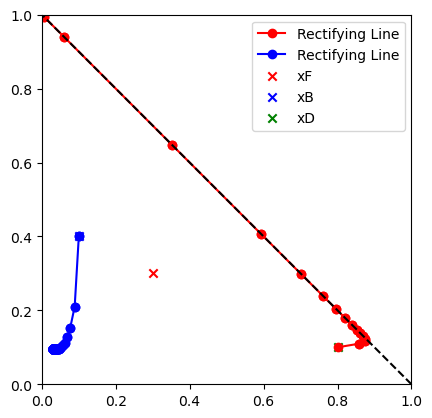

In [5]:
xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.8, 0.1, 0.1])
xB = np.array([0.1, 0.4,0.5])
reflux = 100

distillation_model = DistillationModelTernary(wilson_vle, xF = xF, xD = xD, xB = xB, reflux = reflux)
x_rect_comp = distillation_model.compute_rectifying_stages()[0]
x_strip_comp = distillation_model.compute_stripping_stages()[0]

# Extract x and y coordinates from x_array
x1_rect = x_rect_comp[:, 0]
x2_rect = x_rect_comp[:, 1]
x1_strip = x_strip_comp[:, 0]
x2_strip = x_strip_comp[:, 1]

# Plot the line connecting the points
plt.plot(x1_rect, x2_rect, '-o', label='Rectifying Line', color = "red")  # '-o' means a line with circle markers at each data point
plt.plot(x1_strip, x2_strip, '-o', label='Rectifying Line', color = "blue")  # '-o' means a line with circle markers at each data point

# Mark your special points
plt.scatter(xF[0], xF[1], marker='x', color='red', label='xF')
plt.scatter(xB[0], xB[1], marker='x', color='blue', label='xB')
plt.scatter(xD[0], xD[1], marker='x', color='green', label='xD')

# Set aspect ratio, limits, and diagonal line
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([1, 0], [0, 1], 'k--')  # Diagonal dashed line

# If you want to add a legend
plt.legend()

# Display the plot
plt.show()
